## 3D Plots

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm # color map

# For partial derivatives
from sympy import symbols, diff

%matplotlib inline

In [11]:
# prepare data 
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)

# Make data two-dimentional
x, y = np.meshgrid(x, y)

In [12]:
# Function to make a plot
def f(x, y):
    r = 3 ** (-x ** 2 - y ** 2)
    return 1 / (r + 1)

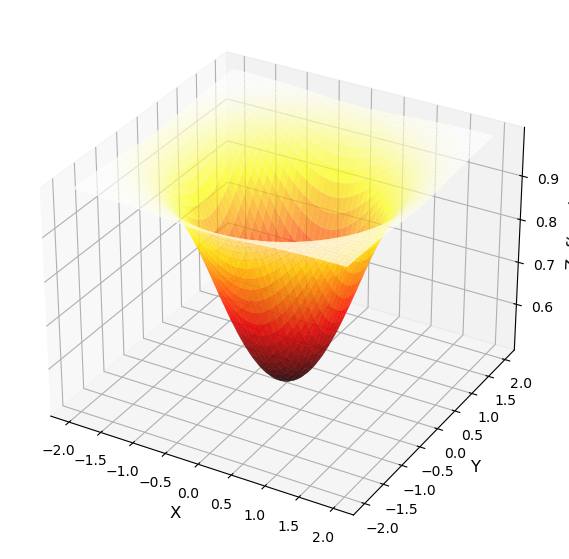

In [13]:
# Plotting 3D graph
fig = plt.figure(figsize=[12, 7])
axes = fig.add_subplot(111, projection='3d')

axes.set_xlabel('X', fontsize=12)
axes.set_ylabel('Y', fontsize=12)
axes.set_zlabel('Z: f(x, y)', fontsize=12)

axes.plot_surface(x, y, f(x, y), cmap=cm.hot, alpha=0.7)
plt.show()


## Partial Derivatives and Symbolic Functions

In [14]:
# set variables in program to variables in an equation
# a, b = symbols(names=['x', 'y'])
a, b = symbols('x, y')

# Calculate partial derivative w.r.t. x
der_fx = diff(f(a, b), a)
 
# Value of f(x, y) at (1.8, 1.0)
print('Value of f(1.8, 1.0):', f(1.8, 1.0))

# Value of der_fx at (1.8, 1.0)
slope = der_fx.evalf(subs={a: 1.8, b: 1.0})
print('Value of slope at (1.8, 1.0):', slope)

Value of f(1.8, 1.0): 0.9906047940325824
Value of slope at (1.8, 1.0): 0.0368089716197505


## Batch Gradient Descent Algorithm

In [15]:
def batch_gradient_descent_3d(initial_guess, learning_rate, max_iter):
    params = np.array([initial_guess[0], initial_guess[1]])
    # we create n x 2 matrix for (x, y) pairs
    values_for_scatter_plot = params.reshape(1, 2)

    # Optimise resource allocation and speed of algorithm
    fpx = diff(f(a, b), a)
    fpy = diff(f(a, b), b)

    for n in range(max_iter):
        # Find gradient w.r.t. x and y separately
        gradient_x = fpx.evalf(subs={a: params[0], b: params[1]})
        gradient_y = fpy.evalf(subs={a: params[0], b: params[1]})

        # Merge gradients into single array
        gradients = np.array([gradient_x, gradient_y])

        # Update params to next expected value
        params = params - learning_rate * gradients
        values_for_scatter_plot = np.concatenate((values_for_scatter_plot, params.reshape(1, 2)), axis=0)

    return values_for_scatter_plot

In [16]:
# Test gradient descent function
gradient_descent_data = batch_gradient_descent_3d(initial_guess=[1.8, 1.0], learning_rate=0.1, max_iter=500)

print('Low cost at (x, y):', gradient_descent_data[-1])
type(gradient_descent_data[ : , 0])

Low cost at (x, y): [3.45838599885832e-11 1.92132555492129e-11]


numpy.ndarray

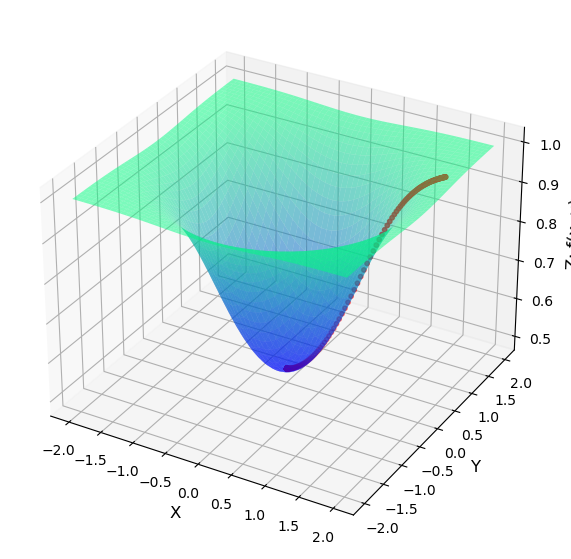

In [17]:
# Plot gradient_descent data
fig = plt.figure(figsize=[12, 7])
axes = fig.add_subplot(111, projection='3d')

axes.set_xlabel('X', fontsize=12)
axes.set_ylabel('Y', fontsize=12)
axes.set_zlabel('Z: f(x, y)', fontsize=12)

axes.plot_surface(x, y, f(x, y), cmap=cm.winter, alpha=0.5)

# scatter takes ndarrays returned by gradient_descent_data[ : , 0]
axes.scatter(gradient_descent_data[ : , 0], gradient_descent_data[ : , 1], f(gradient_descent_data[ : , 0], gradient_descent_data[ : , 1]), s=10, color='red')
plt.show()